# Bike sharing Assignment 

### Business Objectives 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Import required Libaries 


In [1]:
# Importing the required libaries & filtering out the warnings

import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
# changings the display options for rows and columns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',200)

# 1. Reading,Understanding and Visualizing the data 

## 1.1 Importing datasets

### Reading the data in dataframe 'bike'

In [4]:
# Reading data
bike_data = pd.read_csv("day.csv")

## 1.2 Data Understanding

In [5]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking the shape of bike_data
bike_data.shape

(730, 16)

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Statistical summary of all numerical variable 
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Quality check

### Check for NULL/MISSING Values

In [9]:
# calculating the null values percentage of all attributes in dataset
round(100* bike_data.isnull().sum()/len(bike_data),2).sort_values(ascending = False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

# Removing redundant & Unwanted columns 
Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis :
- instant = Its only an index value 
- dteday : This has the date. Sunce we already have seperate columns for 'year' & 'month' we could live without this column.
- causal & registered : Both these columns contains the count of the bike booked by different categories of customers. Since our object is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
- We will save the new dataframe as bike_data, so that the original dataset is preserved for any further analysis/ validation.

In [10]:
# we will remove the columns that are not important from analysis point of view.
col = ['instant','dteday','casual','registered']
bike_data = bike_data.drop(col,axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Checking the number of rows and columns in the dataframe
bike_data.shape

(730, 12)

In [12]:
# Check for datatypes
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
bike_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## 1.3 EDA & Data Visualization

We use data visuzlisation to understand out data better.

### Checking the distribution of the target variable 'cnt'

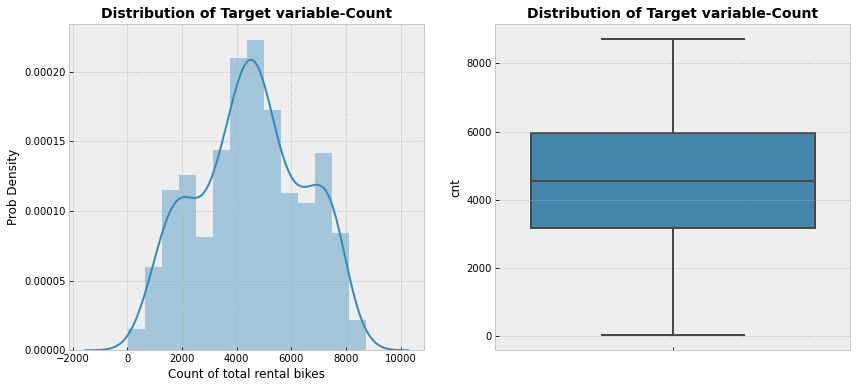

In [14]:
plt.figure (figsize=(14,6))
plt.style.use('bmh')

plt.subplot(1,2,1)
sns.distplot(bike_data['cnt'])
plt.title ('Distribution of Target variable-Count',fontsize =14,fontweight ='bold')
plt.xlabel('Count of total rental bikes')
plt.ylabel('Prob Density')

plt.subplot(1,2,2)
sns.boxplot(y=bike_data['cnt'])
plt.title ('Distribution of Target variable-Count',fontsize =14,fontweight ='bold')

plt.show;

### Checking the relationship of the target variable 'cnt' with other numeric variables

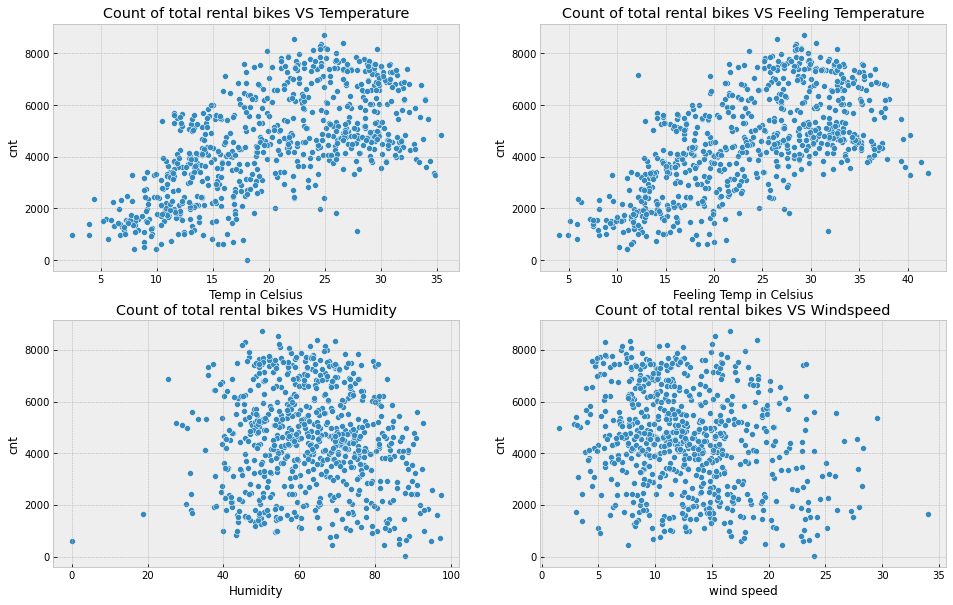

In [15]:
plt.figure (figsize=(16,10))
plt.style.use('bmh')

plt.subplot(2,2,1)
sns.scatterplot('temp','cnt',data = bike_data)
plt.title ('Count of total rental bikes VS Temperature')
plt.xlabel('Temp in Celsius')

plt.subplot(2,2,2)
sns.scatterplot('atemp','cnt',data = bike_data)
plt.title ('Count of total rental bikes VS Feeling Temperature')
plt.xlabel('Feeling Temp in Celsius')

plt.subplot(2,2,3)
sns.scatterplot('hum','cnt',data = bike_data)
plt.title ('Count of total rental bikes VS Humidity')
plt.xlabel('Humidity')

plt.subplot(2,2,4)
sns.scatterplot('windspeed','cnt',data = bike_data)
plt.title ('Count of total rental bikes VS Windspeed')
plt.xlabel('wind speed')

plt.show()

### Inference :
- The target variable 'cnt' is observed to have approximately linear relationships with positive correlation with 'temp' and 'atemp' variables.

## Checking for Multicollinearity : Correlation between different numeric variables

In [16]:
# selecting the numerical columns to find pairwise correlation
bikes_num = bike_data [['cnt','temp','atemp','hum','windspeed']]

In [17]:
bikes_num.corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


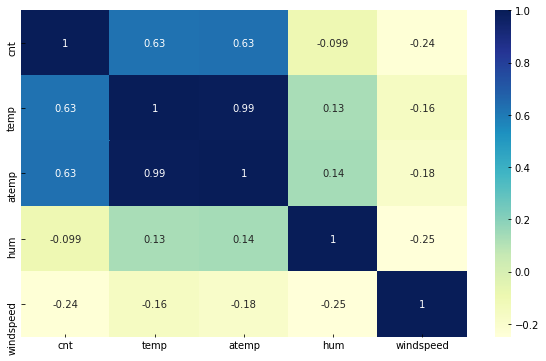

In [18]:
# Plotting heatmap to observe correlation

plt.figure(figsize =(10,6))
sns.heatmap(bikes_num.corr(),annot = True, cmap ='YlGnBu')
plt.show()

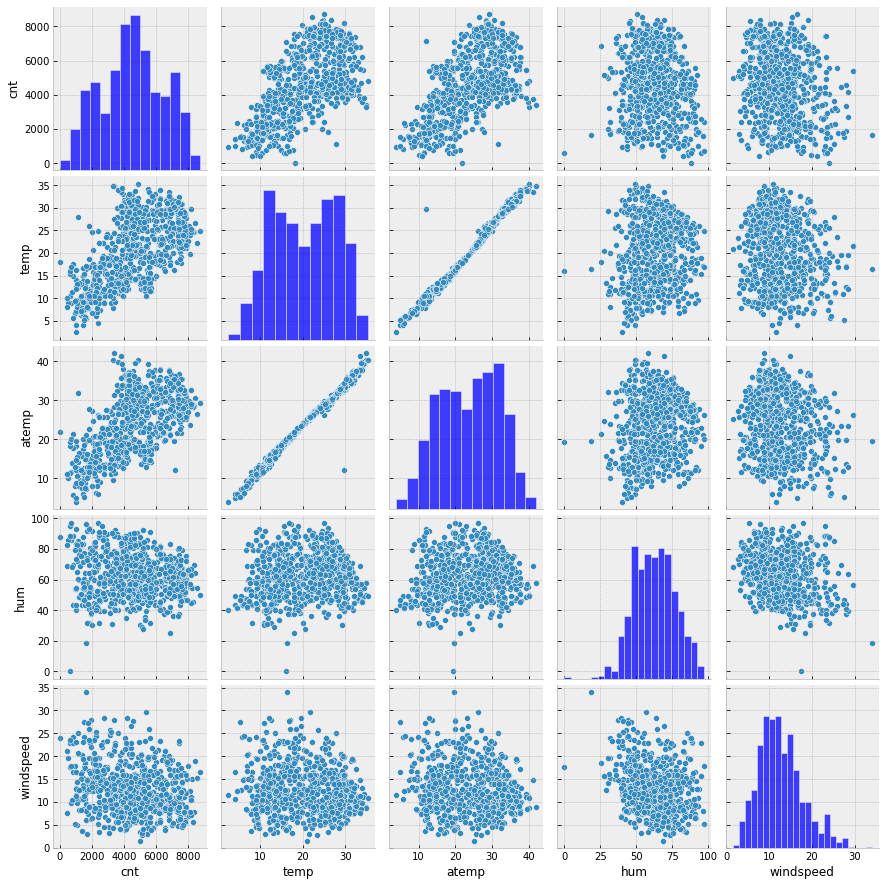

In [19]:
# Plotting pairplot to observe pair wise correlation between different numeric variables 
sns.pairplot(bikes_num)
plt.show()

### Inference : 
- From the above pair plot we can clearly conclude that temp and atemp have the positive correlation with 'cnt'
- On the other hand hum and windspeed seems have negative.

### Dropping 'atemp' variable from the dataset

In [20]:
# Dropping column 'atemp' to avoid Multicollinearity
bike_data = bike_data.drop(['atemp'],axis =1)

## Converting the Categorical feature into Object dtype :

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
# Map the feature values to the category names
bike_data[['season']] = bike_data[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
bike_data[['mnth']] = bike_data[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))
bike_data[['weekday']] = bike_data[['weekday']].apply(lambda x : x.map({0:'sun',1:'mon',2:'tues',3:'wed',4:'thrus',5:'fri',6:'sat'}))
bike_data[['weathersit']] = bike_data[['weathersit']].apply(lambda x : x.map({1:'clear',2:'mist',3:'light_rain/snow',4:'heavy rain'}))

## Visualizing the Categorical Variable

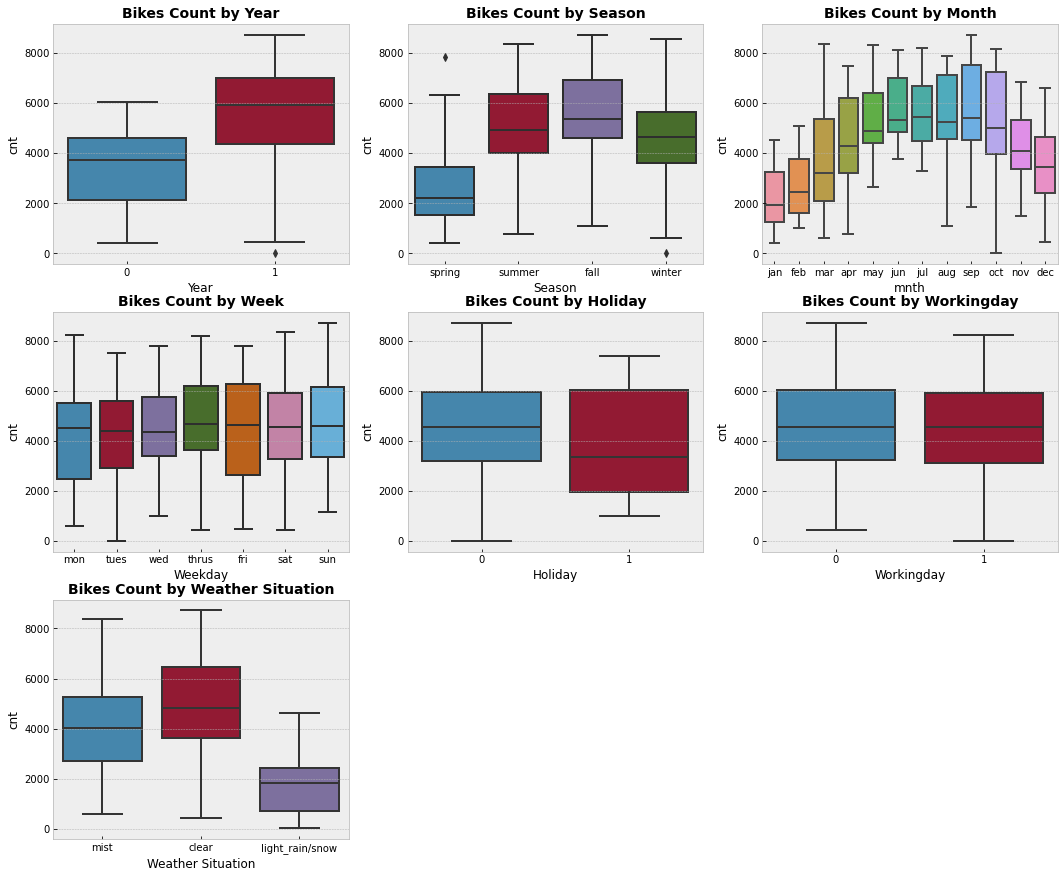

In [22]:
# Creating box plots of categorical variables

plt.figure(figsize =(18,15))

plt.subplot(3,3,1)
sns.boxplot(x='yr',y='cnt', data = bike_data)
plt.xlabel('Year')
plt.title ('Bikes Count by Year',fontsize =14, fontweight ='bold')

plt.subplot(3,3,2)
sns.boxplot(x='season',y='cnt', data = bike_data)
plt.xlabel('Season')
plt.title ('Bikes Count by Season',fontsize =14, fontweight ='bold')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt', data = bike_data)
plt.xlabel('mnth')
plt.title ('Bikes Count by Month',fontsize =14, fontweight ='bold')

plt.subplot(3,3,4)
sns.boxplot(x='weekday',y='cnt', data = bike_data)
plt.xlabel('Weekday')
plt.title ('Bikes Count by Week',fontsize =14, fontweight ='bold')

plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt', data = bike_data)
plt.xlabel('Holiday')
plt.title ('Bikes Count by Holiday',fontsize =14, fontweight ='bold')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt', data = bike_data)
plt.xlabel('Workingday')
plt.title ('Bikes Count by Workingday',fontsize =14, fontweight ='bold')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt', data = bike_data)
plt.xlabel('Weather Situation')
plt.title ('Bikes Count by Weather Situation',fontsize =14, fontweight ='bold')

plt.show()

#### Inferences :

- From the 'season' boxplot we can see that almost 5000 bookings are from the fall season compared to other seasons.
- From the 'yr' boxplot we can observe that the count of bike is increased in 2019.
- From the 'mnth' boxplot we can see that the months are following a trends and could be a good predictor varaible. The booking in mid months are above 4000.
- From the 'holiday' boxplot most of the bike booking were happening when it is not a holiday. It means holiday cannot be a good predictor for the dependent variables. 
- From the 'weekday' boxplot there are seems no trend in the weekday dataset, so we can leave for prediction.
- From the 'workingday' boxplot we can see that bike rental was on the higher end on days which were marked as non-working days. Also, the median count of bikes on working days equals the median count of bikes on working days.
- From the 'weathersit' boxplot we can see that the bike rental was on the higher end on days which were marked as clear, and also the median count of the bikes on clear days are greater as compare to any weather situation.

# 2. Data Preparation

In [23]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thrus,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


## 2.1 Creating Dummy Variables for the Categorical Variables 

In [24]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [25]:
# Creating dummy variables for the Categorical columns 'season', 'month','weekday,'weathersit'

bike_data_season =pd.get_dummies(bike_data['season'],drop_first = True)
bike_data_mnth =pd.get_dummies(bike_data['mnth'],drop_first = True)
bike_data_weekday =pd.get_dummies(bike_data['weekday'],drop_first = True)
bike_data_weathersit =pd.get_dummies(bike_data['weathersit'],drop_first = True)

In [26]:
# Checking the dummy variables created for season
bike_data_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [27]:
# Checking the dummy variables created for month
bike_data_mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Checking the dummy variables created for weekday
bike_data_weekday.head()

,mon,sat,sun,thrus,tues,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [29]:
# Checking the dummy variables created for weathersit
bike_data_weathersit.head()

,light_rain/snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [30]:
# Concat the dataframes with the dummy variables 
bike_data = pd.concat ([bike_data,bike_data_season,bike_data_mnth,bike_data_weekday,bike_data_weathersit],axis =1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
0,spring,0,jan,0,mon,1,mist,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tues,1,mist,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thrus,1,clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
# Drop the variables no longer required, as dummy variables have already been created for them 

columns_to_drop = ['season','mnth','weekday','weathersit']
bike_data = bike_data.drop(columns_to_drop,axis = 1)
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Checking the columns of the final dataframe
print(bike_data.columns)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat',
       'sun', 'thrus', 'tues', 'wed', 'light_rain/snow', 'mist'],
      dtype='object')


In [33]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    uint8  
 8   summer           730 non-null    uint8  
 9   winter           730 non-null    uint8  
 10  aug              730 non-null    uint8  
 11  dec              730 non-null    uint8  
 12  feb              730 non-null    uint8  
 13  jan              730 non-null    uint8  
 14  jul              730 non-null    uint8  
 15  jun              730 non-null    uint8  
 16  mar              730 non-null    uint8  
 17  may             

## 2.2 Train-Test Split

In [34]:
# Dividing the dataset into train and test sets in the ratio 70:30

bike_train, bike_test = train_test_split(bike_data,train_size = 0.7,random_state =70)

In [35]:
# Checking the dimensions 
print(bike_data.shape)
print(bike_train.shape)
print(bike_test.shape)

(730, 29)
(510, 29)
(220, 29)


## 2.3 Re-scaling of variables -Min-Max scaling

In [36]:
# Scaling the numeric variables using min-max scaler so that all variables have a comparable scale
scaler =MinMaxScaler()
num_vars =['temp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
692,1,0,0,0.273137,0.416024,0.730778,0.259434,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
127,0,0,1,0.584649,0.649529,0.107707,0.495973,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
133,0,0,1,0.575304,0.948586,0.232045,0.389669,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
524,1,0,0,0.812053,0.449443,0.251294,0.860101,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
209,0,0,0,0.970925,0.557841,0.312833,0.439945,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [37]:
bike_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.498039,0.033333,0.684314,0.538658,0.640938,0.343989,0.509482,0.256863,0.252941,0.233333,0.088235,0.098039,0.076471,0.088235,0.080392,0.092157,0.088235,0.076471,0.078431,0.072549,0.082353,0.152941,0.143137,0.145098,0.137255,0.133333,0.129412,0.033333,0.317647
std,0.500487,0.179682,0.465245,0.229058,0.147970,0.161191,0.228168,0.437332,0.435124,0.423368,0.283915,0.297660,0.266010,0.283915,0.272166,0.289531,0.283915,0.266010,0.269113,0.259649,0.275172,0.360284,0.350557,0.352545,0.344454,0.340268,0.335985,0.179682,0.466018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.334143,0.533848,0.225964,0.351473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.529616,0.631962,0.324351,0.511390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741963,0.741753,0.434629,0.676542,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.4  Correlation Matrix

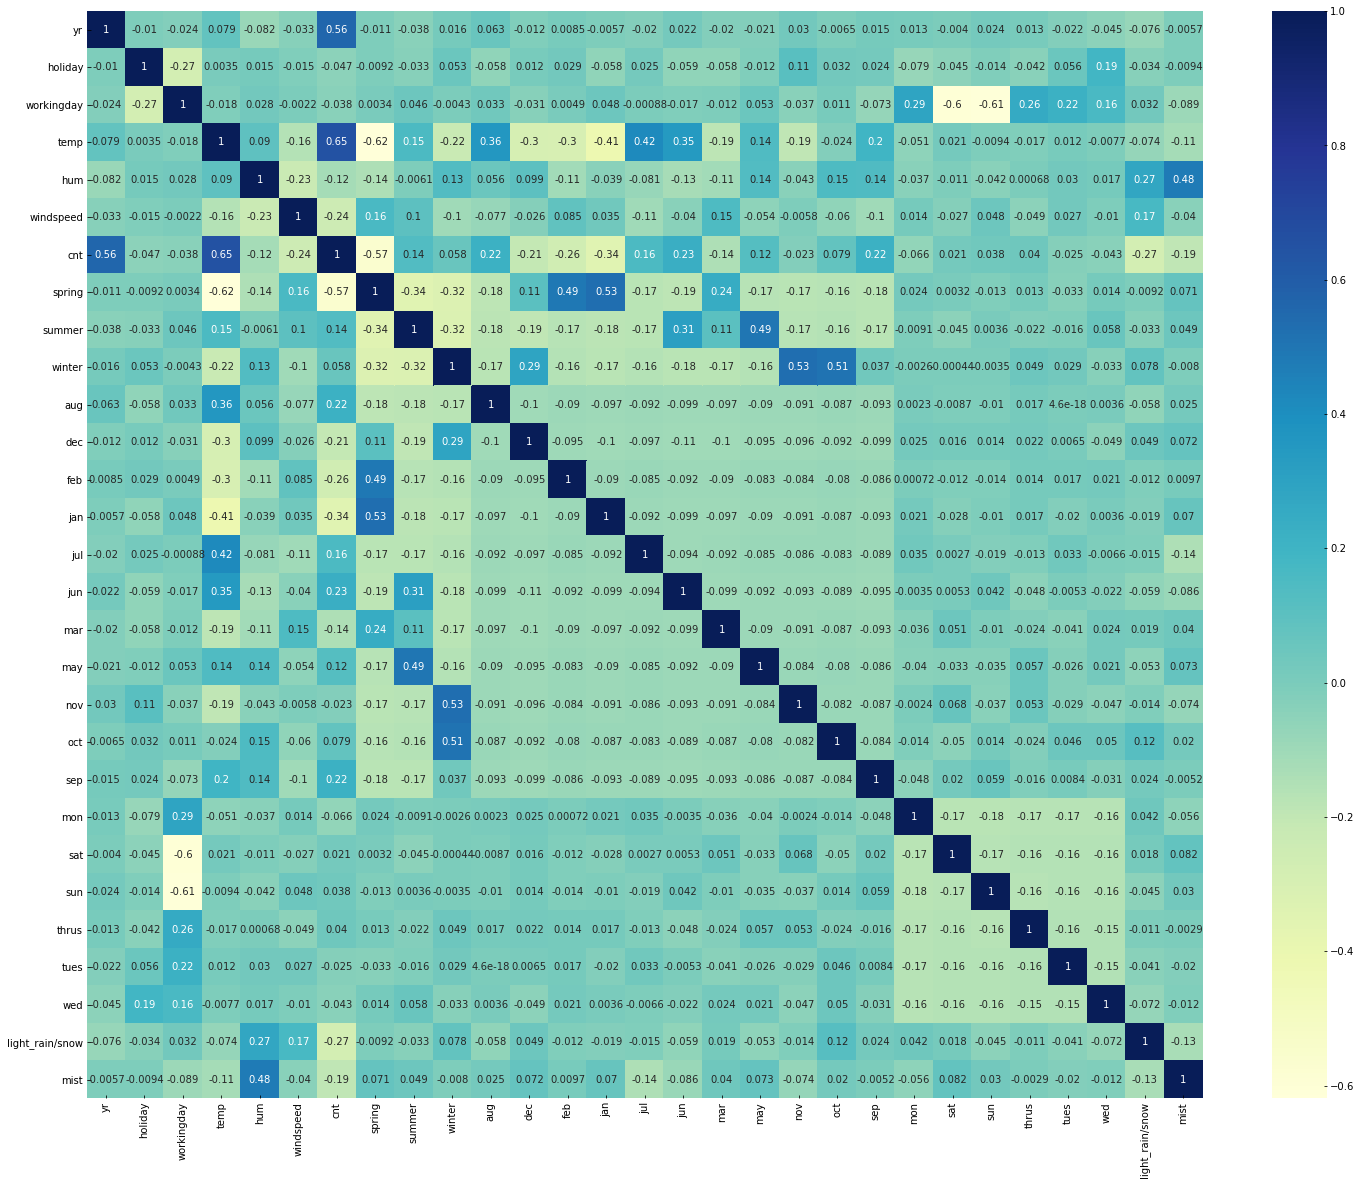

In [38]:
# Plotting correlation of the training dataframe 

plt.figure(figsize =(25,20))
sns.heatmap(bike_train.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

We observe target variable has highest correlation with temp.

# 3. Data Modelling 

## 3.1 Dividing X and Y sets for model building

In [39]:
# Dividing data into X and Y variables 
Y_train = bike_train.pop('cnt')
X_train = bike_train

In [40]:
Y_train.head()

692    0.259434
127    0.495973
133    0.389669
524    0.860101
209    0.439945
Name: cnt, dtype: float64

In [41]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
692,1,0,0,0.273137,0.416024,0.730778,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
127,0,0,1,0.584649,0.649529,0.107707,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
133,0,0,1,0.575304,0.948586,0.232045,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
524,1,0,0,0.812053,0.449443,0.251294,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
209,0,0,0,0.970925,0.557841,0.312833,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 3.2 Selecting the top 15 Variables using RFE : Recursive Feature Elimination

We will be using the LinearRegression function from Scrikit Learn for its compatibility with RFE (which is a utility from sklearn)

In [42]:
# Running RFE for 15 predictor variables
lm = LinearRegression()
lm.fit(X_train,Y_train)
rfe= RFE(lm,15)
rfe = rfe.fit(X_train, Y_train)

In [43]:
# Displaying the feature selected and the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 13),
 ('jan', False, 12),
 ('jul', True, 1),
 ('jun', False, 11),
 ('mar', False, 7),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 9),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', False, 3),
 ('sun', False, 2),
 ('thrus', False, 14),
 ('tues', False, 5),
 ('wed', False, 6),
 ('light_rain/snow', True, 1),
 ('mist', True, 1)]

In [44]:
# Checking the selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'dec', 'jul', 'may', 'nov', 'sep', 'light_rain/snow', 'mist'], dtype='object')

In [45]:
# Checking the selected variables
X_train.columns[~rfe.support_]

Index(['summer', 'aug', 'feb', 'jan', 'jun', 'mar', 'oct', 'mon', 'sat', 'sun', 'thrus', 'tues', 'wed'], dtype='object')

In [46]:
# Building the model using statsmodel,for the detailed statistics

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,dec,jul,may,nov,sep,light_rain/snow,mist
692,1,0,0,0.273137,0.416024,0.730778,0,1,0,0,0,1,0,0,0
127,0,0,1,0.584649,0.649529,0.107707,0,0,0,0,1,0,0,0,0
133,0,0,1,0.575304,0.948586,0.232045,0,0,0,0,1,0,0,0,1
524,1,0,0,0.812053,0.449443,0.251294,0,0,0,0,0,0,0,0,0
209,0,0,0,0.970925,0.557841,0.312833,0,0,0,1,0,0,0,0,0


## 3.3 Building the model with the selected variables, using statsmodel for the detailed statistics

In [47]:
# Creating the X_train dataframe with the RFE selected variables

X_train_rfe = X_train[col]

In [48]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 692 to 334
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               510 non-null    int64  
 1   holiday          510 non-null    int64  
 2   workingday       510 non-null    int64  
 3   temp             510 non-null    float64
 4   hum              510 non-null    float64
 5   windspeed        510 non-null    float64
 6   spring           510 non-null    uint8  
 7   winter           510 non-null    uint8  
 8   dec              510 non-null    uint8  
 9   jul              510 non-null    uint8  
 10  may              510 non-null    uint8  
 11  nov              510 non-null    uint8  
 12  sep              510 non-null    uint8  
 13  light_rain/snow  510 non-null    uint8  
 14  mist             510 non-null    uint8  
dtypes: float64(3), int64(3), uint8(9)
memory usage: 32.4 KB


In [49]:
X_train_rfe.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,dec,jul,may,nov,sep,light_rain/snow,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.498039,0.033333,0.684314,0.538658,0.640938,0.343989,0.256863,0.233333,0.098039,0.080392,0.076471,0.078431,0.082353,0.033333,0.317647
std,0.500487,0.179682,0.465245,0.229058,0.147970,0.161191,0.437332,0.423368,0.297660,0.272166,0.266010,0.269113,0.275172,0.179682,0.466018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.334143,0.533848,0.225964,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.529616,0.631962,0.324351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.741963,0.741753,0.434629,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model 1

In [50]:
# Building Model 1 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the model
lm = sm.OLS(Y_train, X_train_rfe).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.96e-187
Time:                        22:40:30   Log-Likelihood:                 501.71
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     494   BIC:                            -903.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3761      0.033     

The R-squared value obtained is 0.842, and all p values except for variable feb are < 0.05

### Model 2

The p-value of the variable 'workingday' = 0.045  is higher than the significance level of 0.05. This variable 'workingday' is insignificant in presence of other variables, hence we drop this and update the model.

In [51]:
# Dropping the variable 'workingday'

X_train_new = X_train_rfe.drop(['workingday'],axis =1)

In [52]:
# Building Model 2 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.10e-187
Time:                        22:40:30   Log-Likelihood:                 499.64
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     495   BIC:                            -905.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3654      0.033     

We also calculate the Variance Inflation Factor or VIF , which gives an idea about how much the feature variables are correlated with each other.

In [53]:
# Calculate the VIF of the new model 2

vif = pd.DataFrame()
X_train_new = X_train_new.drop(['const'],axis =1)
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,hum,22.29
2,temp,15.24
4,windspeed,4.90
6,winter,2.92
5,spring,2.81
13,mist,2.17
0,yr,2.04
10,nov,1.79
7,dec,1.48
8,jul,1.48


### Model 3

In the last model, all the p-values are below the significance level of 0.05. We will drop the 'hum' variable which has high VIF, or high multicollinearity and update the model.

In [54]:
# Dropping the variable 'hum'

X_train_new = X_train_new.drop(['hum'],axis =1)

In [55]:
# Building Model 3 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.41e-184
Time:                        22:40:30   Log-Likelihood:                 489.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     496   BIC:                            -891.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2695      0.025     

In [56]:
# Calculate the VIF of the new model 3

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.60
3,windspeed,4.87
5,winter,2.45
0,yr,2.04
4,spring,1.87
9,nov,1.77
12,mist,1.50
7,jul,1.46
6,dec,1.44
10,sep,1.25


### Model 4

The p-value of the variable 'may' = 0.065  is higher than the significance level of 0.05. This variable 'may' is insignificant in presence of other variables, hence we drop this and update the model.

In [57]:
# Dropping the variable 'may'

X_train_new = X_train_new.drop(['may'],axis =1)

In [58]:
# Building Model 4 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.26e-184
Time:                        22:40:31   Log-Likelihood:                 487.50
No. Observations:                 510   AIC:                            -949.0
Df Residuals:                     497   BIC:                            -893.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2776      0.025     

In [59]:
# Calculate the VIF of the new model 4

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.28
3,windspeed,4.87
5,winter,2.40
0,yr,2.04
4,spring,1.83
8,nov,1.77
11,mist,1.49
6,dec,1.44
7,jul,1.40
9,sep,1.22


### Model 5

In the last model, all the p-values are below the significance level of 0.05. We will drop the 'windspeed' variable which has high VIF, or high multicollinearity and update the model.

In [60]:
# Dropping the variable 'windspeed'

X_train_new = X_train_new.drop(['windspeed'],axis =1)

In [61]:
# Building Model 5 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.32e-182
Time:                        22:40:31   Log-Likelihood:                 479.32
No. Observations:                 510   AIC:                            -934.6
Df Residuals:                     498   BIC:                            -883.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2323      0.023     

In [62]:
# Calculate the VIF of the new model 5

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,2.91
4,winter,2.38
0,yr,2.04
7,nov,1.74
10,mist,1.48
5,dec,1.44
3,spring,1.36
6,jul,1.36
8,sep,1.21
9,light_rain/snow,1.06


### Model 6

In this model, we will drop the 'holiday' variable and update the model.

In [63]:
# Dropping the variable 'holiday'

X_train_new = X_train_new.drop(['holiday'],axis =1)

In [64]:
# Building Model 6 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          6.55e-182
Time:                        22:40:31   Log-Likelihood:                 475.42
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     499   BIC:                            -882.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2329      0.023     

In [65]:
# Calculate the VIF of the new model 6

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,2.90
3,winter,2.38
0,yr,2.04
6,nov,1.72
9,mist,1.48
4,dec,1.43
2,spring,1.36
5,jul,1.36
7,sep,1.21
8,light_rain/snow,1.06


### Model 7

In this model, we will drop the 'jul' variable and update the model.

In [66]:
# Dropping the variable 'jul'

X_train_new = X_train_new.drop(['jul'],axis =1)

In [67]:
# Building Model 7 with RFE selected variables

# Adding constant for the model as reqd by statsmodel
X_train_lm = sm.add_constant(X_train_new)

# Running the model
lm = sm.OLS(Y_train, X_train_lm).fit()

# Printing the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.01e-181
Time:                        22:40:32   Log-Likelihood:                 469.98
No. Observations:                 510   AIC:                            -920.0
Df Residuals:                     500   BIC:                            -877.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2479      0.023     

In [68]:
# Calculate the VIF of the new model 7

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,winter,2.34
1,temp,2.24
0,yr,2.02
5,nov,1.72
8,mist,1.45
4,dec,1.43
2,spring,1.34
6,sep,1.17
7,light_rain/snow,1.06


In [69]:
print(lm.params)

const              0.247858
yr                 0.231547
temp               0.382772
spring            -0.138114
winter             0.074459
dec               -0.060173
nov               -0.082864
sep                0.059703
light_rain/snow   -0.302424
mist              -0.076225
dtype: float64


#### Observation :

- All the p-values which is less than the significance level of 0.05.
- No significant VIF are observed, all the VIF values less than 5.
- The model i.e., Model 7 looks great as there seems to be very LOW Multicolinearity between the predictors and the p-value are less than the level of 0.05. For now, we will consider this as our final model.

In [70]:
# Build a model with all columns to select fetures automatically
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [71]:
# Let us build the final model using sklearn
col = ['yr','holiday','temp','spring','winter','jul','sep','light_rain/snow','mist']

# Build a model with above columns
lr =build_model_sk(X_train[col],Y_train)
print(lr.intercept_,lr.coef_)

0.21006676173038996 [ 0.2276564  -0.07530514  0.45601111 -0.1267898   0.04220504 -0.06150983
  0.06204502 -0.29778022 -0.07747393]


# 4. Residual Analysis

### Check and validate the variour assumptions of regression by preforming residual analysis of error terms :

- Eror terms are normally distributed with mean = 0
- Error terms are independent of one another.
- Error terms have constant variance.
- Error terms do not have any visible patterns.

## 4.1 Distribution of error terms

In [72]:
# predicted y values
Y_train_pred = lm.predict(X_train_lm)

In [73]:
# Residual /error term

residual = Y_train - Y_train_pred

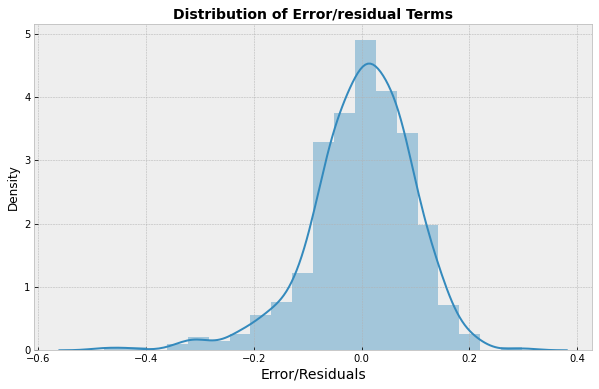

In [74]:
# Plotting histogram to observe the distribution of residual/ error terms

plt.figure(figsize =(10,6))
sns.distplot (residual , bins = 20)
plt.title('Distribution of Error/residual Terms', fontsize = 14, fontweight = 'bold')
plt.xlabel('Error/Residuals', fontsize = 14)
plt.show()

#### Inference :

We observe that the error terms have an approximately normal distribution with mean = 0, whcih validates the fundamental assumption of Linear Regression.

## 4.2 Look for pattern in Residuals 

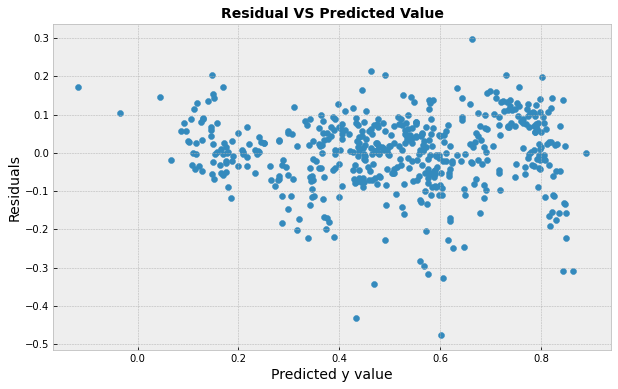

In [75]:
# plot scatterplot to check for any patterns between predicted y value and residuals

plt.figure(figsize =(10,6))
plt.scatter(Y_train_pred, residual)
plt.title('Residual VS Predicted Value', fontsize = 14, fontweight = 'bold')
plt.xlabel('Predicted y value', fontsize = 14)
plt.ylabel('Residuals', fontsize =14)
plt.show()

#### Inference : 
Error terms have a constant variance and no patterns can be found, which validates the assumption of Linear Regression.

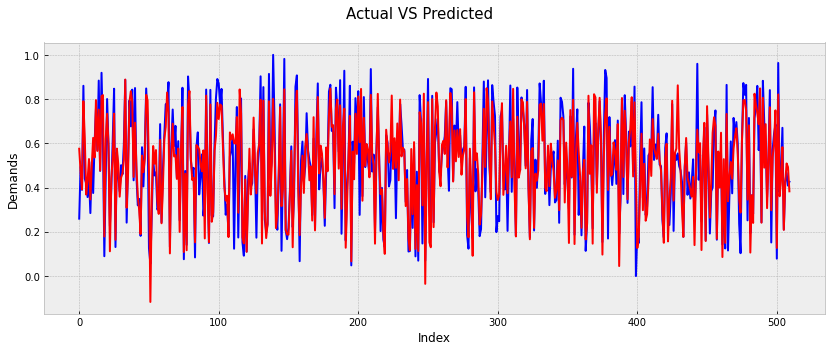

In [76]:
# Actual VS Predicted 

c = [i for i in range(0,len(X_train),1)]
fig =plt.figure(figsize =(14,5))
plt.plot(c,Y_train,color = 'blue')
plt.plot(c,Y_train_pred,color = 'Red')
plt.suptitle('Actual VS Predicted ', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and predicted result following almost the same pattern so this model seems ok.

# 5. Predictions & Model Evaluation 

## 5.1 Predictions

### Applying the scaling on the test sets

In [77]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
625,1,0,1,25.556653,87.2500,23.958329,4073,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
572,1,0,0,32.048347,59.4583,10.250464,6904,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
201,0,0,0,33.415000,69.1250,14.875407,3784,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
148,0,0,1,27.367500,81.8750,14.333846,4788,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
512,1,1,0,29.212500,67.6250,13.166907,6043,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [78]:
num_vars =['temp','hum','windspeed','cnt']
bike_test[num_vars] = scaler.transform (bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
625,1,0,1,0.703024,0.897172,0.691023,0.466061,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
572,1,0,0,0.900316,0.611396,0.269239,0.791763,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
201,0,0,0,0.941851,0.710797,0.411546,0.432812,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
148,0,0,1,0.758058,0.841902,0.394883,0.548320,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
512,1,1,0,0.814131,0.695373,0.358977,0.692706,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [79]:
bike_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,mon,sat,sun,thrus,tues,wed,light_rain/snow,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.018182,0.704545,0.555893,0.655745,0.352546,0.531467,0.222727,0.250,0.268182,0.077273,0.054545,0.077273,0.077273,0.095455,0.059091,0.077273,0.104545,0.090909,0.113636,0.081818,0.122727,0.140909,0.136364,0.154545,0.168182,0.172727,0.018182,0.381818
std,0.501120,0.133913,0.457287,0.226057,0.142493,0.156975,0.209294,0.417026,0.434,0.444023,0.267633,0.227609,0.267633,0.267633,0.294512,0.236333,0.267633,0.306665,0.288135,0.318093,0.274713,0.328872,0.348721,0.343957,0.362295,0.374881,0.378873,0.133913,0.486940
min,0.000000,0.000000,0.000000,0.046591,0.323051,0.047441,0.047055,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.370745,0.539585,0.250034,0.387627,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.571151,0.673950,0.330123,0.532329,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746377,0.768745,0.435254,0.705821,0.000000,0.250,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.983385,0.989717,0.824380,0.951680,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and Y_test

In [80]:
Y_test = bike_test.pop('cnt')
X_test = bike_test

Now we use model to make predictions

### Creating X_test_new dataframe by dropping the variables from X_test which were not present in our final model.

In [81]:
# Creating X_test_new dataframe with only the selected variables from final model
X_test_new = X_test [X_train_new.columns]

In [82]:
# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [83]:
# Making predictions
Y_pred = lm.predict(X_test_new)

# 5. Evaluation

### Checking spread of actual value and predicted value

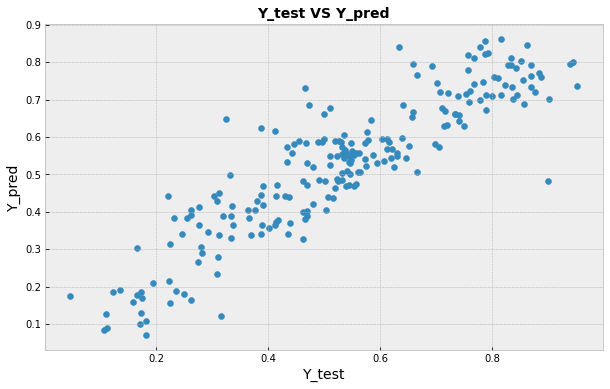

In [84]:
# Plotting scatterplot of Y_test and Y_pred to understand the spread.

plt.figure(figsize =(10,6))
plt.scatter(Y_test,Y_pred)
plt.title('Y_test VS Y_pred', fontsize = 14, fontweight = 'bold')
plt.xlabel('Y_test', fontsize = 14)
plt.ylabel('Y_pred', fontsize =14)
plt.show()

We have a model that seems good enough to predict demand of bikes.

### Plot test vs Predicted test Values 

In [85]:
# Actual VS Predicted 
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig =plt.figure(figsize =(14,5))
    plt.plot(c,act, color ='blue',linewidth = 2.5, linestyle ='-')
    plt.plot(c,pred, color ='red',linewidth = 2.5, linestyle ='-')
    plt.suptitle('Actual and Predicted '+dataname, fontsize = 20)
    plt.xlabel('Index')
    plt.ylabel('Counts')

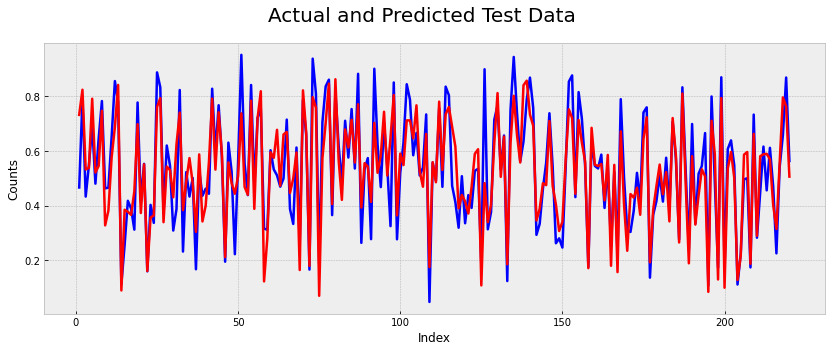

In [86]:
# Plot Actual vs Predcited for Test Data
plot_act_pred(Y_test,Y_pred,len(Y_test)+1,'Test Data')

#### Inference :

As we can see predictions for test data is very close to actuals.

## Calculating R-squared values for train dataset and test dataset 

In [87]:
# Return the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.09337001451110342

In [88]:
# Evaluation of test via compariso of y_pred and y_test
r_squared = r2_score(Y_test,Y_pred)
r_squared

0.8000689653400428

In [89]:
# Let's find out the Adjusted R^2 value :

# Here n is number of rows in X
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1 
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r_squared)*(n-1)/(n-p-1)
adjusted_r2

0.7905028871266477

In [90]:
# r2_score for train dataset
r2_score (Y_train,Y_train_pred)

0.8215812968817802

#### Inference : 
R2 value for prediction on test data (0.822) is almost same as R2 value of train data (0.816). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data).

### Independent Variables VS Residual 

In [91]:
x_t = X_train_new.iloc[:,0].values

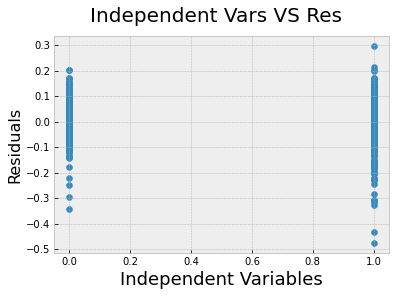

In [92]:
# Plotting the residual to see if a pattern exists
# Checking assumptions of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(x_t, residual)
plt.suptitle('Independent Vars VS Res', fontsize = 20)
plt.xlabel('Independent Variables', fontsize = 18)
plt.ylabel('Residuals', fontsize =16)
plt.show()

# 6. Final Model Interpretation and Inferences

In [93]:
# Statistics of final model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          8.01e-181
Time:                        22:40:37   Log-Likelihood:                 469.98
No. Observations:                 510   AIC:                            -920.0
Df Residuals:                     500   BIC:                            -877.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2479      0.023     

In [94]:
# Calculate the VIF of the new model 7

vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,winter,2.34
1,temp,2.24
0,yr,2.02
5,nov,1.72
8,mist,1.45
4,dec,1.43
2,spring,1.34
6,sep,1.17
7,light_rain/snow,1.06


In [95]:
# Coefficients of final model in order to priority
df = pd.DataFrame(lm.params)
df.columns = ["Coefficient"]
df["Absolute_value"] = abs(df["Coefficient"])
df.sort_values(by = "Absolute_value", ascending = False)

,Coefficient,Absolute_value
temp,0.382772,0.382772
light_rain/snow,-0.302424,0.302424
const,0.247858,0.247858
yr,0.231547,0.231547
spring,-0.138114,0.138114
nov,-0.082864,0.082864
mist,-0.076225,0.076225
winter,0.074459,0.074459
dec,-0.060173,0.060173
sep,0.059703,0.059703


## 6.1 Inferences :

- The Rsquared and Adjusted R-squared values of our final model are 0.822 and 0.818 respectively. Thus approximately 81% of the variation of the dependent vaiables is explained by the model.


- The R-sqauredd score calculated on the test data is 0.80 and Adjusted test data is 0.79.


- The F-statistic and Prob(F-statistic) values of our final model are 255.8 (high value) and  8.01e-181(approximately equal to zero) respectively. Therefore our overall model fit is significant.


- The p-values for all the coefficients in the final model are less than the significance level of 0.05, hence all the predictors are statistically significant.


- The VIF values for all the coefficients in the final model are less than 5, hence all the predictors have low multicollinearity.


## 6.2 Interpretation :

From the above final model, the equation of our best fitted line is as follow :

**$ cnt = 0.3827 \times temp -0.3024 \times  light  rain/snow + 0.2315 \times yr -0.1381 \times spring -0.08286 \times nov - 0.0762 \times mist + 0.0744 \times winter - 0.0601 \times dec -0.0597 \times sep + 0.2478$**



Top variables in predicting the demand for shared bikes, along with their coefficients are as follows :

- **temp,0.3827** : The demand for bikes rises with the increase in temperature. For every unit increase in temperature, the bike hire count increases by 0.3827 units, when all other variables are kept constant.


- **light rain/snow,-0.3024** : This variable has a negative coefficient, hence affects the demand for bikes inversely. For a unit increase in light rain/snow variable, the bike count is expected to decrease by 0.3024 units.



- **year,0.2315** : As the year variable increases, there is an increasing demand of bikes. For every increase of one year, the bike hire count is expected to increase by 0.2315 units, keeping all other variables as constant.



- **spring,-0.1381** : For every unit increase in the spring variable, the count is expected to decrease by -0.1381 units, when calculated with respect to fall season reference variable, keeping all other variables as constant.



- **nov,-0.08286** : This variable has a negative coefficient.The cnt decreases by -0.08286 units for every unit increase in the november month variable, when all other variables are kept constant.



- **mist,−0.0762** : This variable has a negative coefficient.For every unit increase in the mist variable, when all other variables are kept constant.



- **sep,-0.0597** :  This variable has a negative coefficient.The cnt decreases by -0.0597 units for every unit increase in the september month variable, when all other variables are kept constant.




- **winter,0.0744** : For every unit increase in the winter variable,the count is expected to increase by 0.0744 units, when calculated with respect to Fall season as reference , keeping all other variables as constant.



- **dec,-0.0601** : This variable has a negative coefficient. The cnt decreases by -0.0601 units for every unit increase in the december month variable, when all other variables are kept constant.



- **const,0.2478** : Assuming all other predictor variables = 0, then the cnt = 0.2478.

In [96]:
def linear_assumption(model, features, label ):
    """
    Linearity : Assumes that there is a linear relationship between the predictors and 
    the reponse variable. If not, either a quadratic term or another 
    algorithm should be used.
    """
    print('Assumption 1 : linear relationship between the Target and the Feature','\n')
    
    print( 'Checking with a scatter plot of actual vs predicted.',
         'Predictions should follow he diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals (model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x = 'Actual', y ='Predicted', data = df_results, fit_reg = False, size = 7)
    
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(),df_results.max().max() )
    plt.plot(line_coords, line_coords, # X and y points
            color = 'darkorange', linestyle = '--')
    plt.title('Actual VS Predcited')
    plt.show()

In [97]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    Predictions = model.predict(features)
    df_results = pd.DataFrame ({'Actual':label,'Predicted': Predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption 1 : linear relationship between the Target and the Feature 

Checking with a scatter plot of actual vs predicted. Predictions should follow he diagonal line.


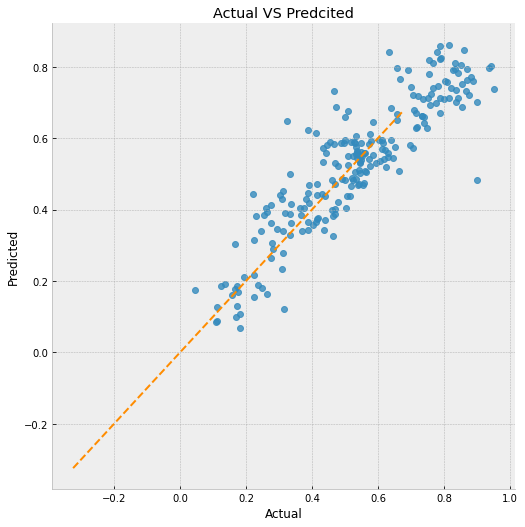

In [98]:
linear_assumption(lm, X_test_new, Y_test)

In [99]:
def homoscedasticity_assumption(model,features, label):
    """
    Homoscedasticity : Assumes that the errors exhibit constant variance 
    """
    print ('Assumption 5 : Homoscedasticity of Error Terms', '\n')
    
    print('Residuals sould have relative constant variance')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals (model, features, label)
    
    # Plotting the residuals
    plt.subplots(figsize =(12,6))
    ax = plt.subplot(111) # to remove spines
    plt.scatter (x = df_results.index, y = df_results.Residuals, alpha = 0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color = 'darkorange',linestyle = '--')
    ax.spines['right'].set_visible(False) # removing the right spine
    ax.spines['top'].set_visible(False) # removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5 : Homoscedasticity of Error Terms 

Residuals sould have relative constant variance


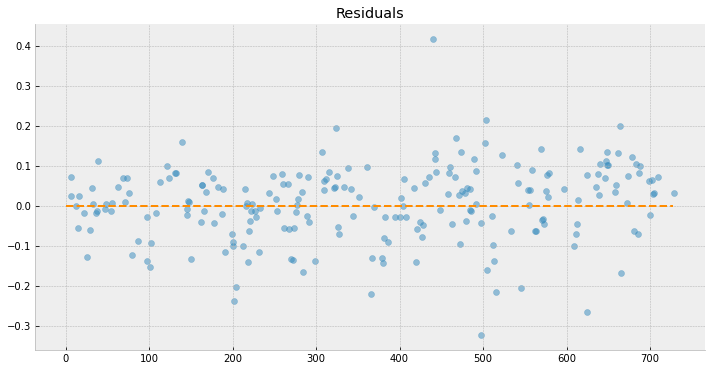

In [100]:
homoscedasticity_assumption(lm, X_test_new, Y_test)